In [1]:
import pylearn2.utils
import pylearn2.config
import theano
import neukrill_net.dense_dataset
import neukrill_net.utils
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import holoviews as hl
%load_ext holoviews.ipython
import sklearn.metrics

Using gpu device 0: Tesla K40c
:0: FutureWarning: IPython widgets are experimental and may change in the future.


Welcome to the HoloViews IPython extension! (http://ioam.github.io/holoviews/)
Available magics: %compositor, %opts, %params, %view, %%labels, %%opts, %%view


Monitoring Traces
======


In [2]:
m = pylearn2.utils.serial.load(
    "/disk/scratch/neuroglycerin/models/experiment_more_pooling_recent.pkl")

Checking the input dimensions on each layer.

In [14]:
print(m)

h1
	Input space: Conv2DSpace(shape=(64, 64), num_channels=1, axes=('b', 0, 1, 'c'), dtype=float32)
	Total input dimension: 4096
h2
	Input space: Conv2DSpace(shape=(34, 34), num_channels=48, axes=('b', 'c', 0, 1), dtype=float32)
	Total input dimension: 55488
h3
	Input space: Conv2DSpace(shape=(18, 18), num_channels=128, axes=('b', 'c', 0, 1), dtype=float32)
	Total input dimension: 41472
h4
	Input space: Conv2DSpace(shape=(10, 10), num_channels=128, axes=('b', 'c', 0, 1), dtype=float32)
	Total input dimension: 12800
y
	Input space: VectorSpace(dim=1024, dtype=float32)
	Total input dimension: 1024


In [7]:
import neukrill_net.plotting as pl

In [4]:
nll_channels = [c for c in m.monitor.channels.keys() if 'nll' in c]

No signs of overfitting:

Overlay.Overlay
*--Curve.Train_y_y_1_nll   (y)
*--Curve.Train_y_y_2_nll   (y)
*--Curve.Train_y_y_3_nll   (y)
*--Curve.Train_y_y_4_nll   (y)
*--Curve.Train_y_y_5_nll   (y)
*--Curve.Train_y_y_6_nll   (y)
*--Curve.Valid_y_y_1_nll   (y)
*--Curve.Valid_y_y_2_nll   (y)
*--Curve.Valid_y_y_3_nll   (y)
*--Curve.Valid_y_y_4_nll   (y)
*--Curve.Valid_y_y_5_nll   (y)
*--Curve.Valid_y_y_6_nll   (y)
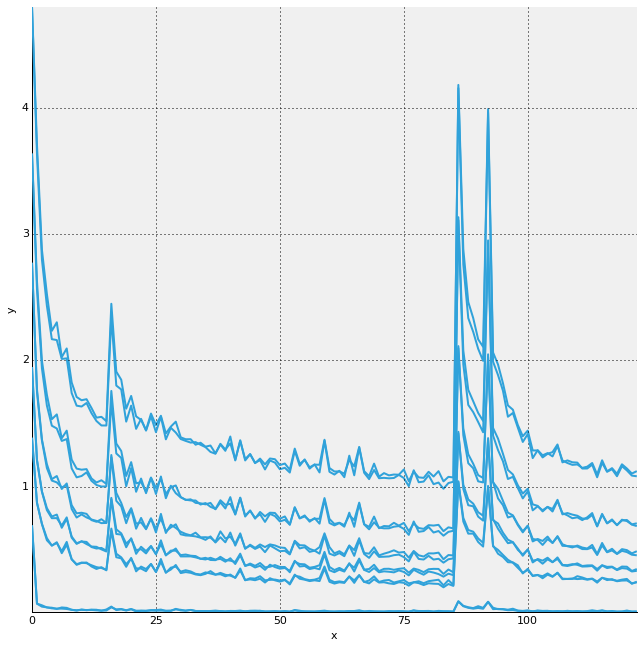

In [13]:
pl.monitor_channels(m, nll_channels, x_axis="epoch", overlay=True)

In [12]:
reload(pl)

<module 'neukrill_net.plotting' from '/afs/inf.ed.ac.uk/user/s08/s0805516/repos/neukrill-net-tools/neukrill_net/plotting.py'>

Plotting all the monitoring channels at the same time, could see something interesting happening:

Train_h1_kernel_norms_mean
      I : Curve.Train_h1_kernel_norms_mean   (y)
   Train_h2_kernel_norms_mean
      I : Curve.Train_h2_kernel_norms_mean   (y)
   Train_h3_kernel_norms_mean
      I : Curve.Train_h3_kernel_norms_mean   (y)
   Train_h4_col_norms_mean   
      I : Curve.Train_h4_col_norms_mean   (y)
   Train_h4_row_norms_mean   
      I : Curve.Train_h4_row_norms_mean   (y)
   Train_y_y_1_col_norms_mean
      I : Curve.Train_y_y_1_col_norms_mean   (y)
   Train_y_y_1_row_norms_mean
      I : Curve.Train_y_y_1_row_norms_mean   (y)
   Train_y_y_2_col_norms_mean
      I : Curve.Train_y_y_2_col_norms_mean   (y)
   Train_y_y_2_row_norms_mean
      I : Curve.Train_y_y_2_row_norms_mean   (y)
   Train_y_y_3_col_norms_mean
      I : Curve.Train_y_y_3_col_norms_mean   (y)
   Train_y_y_3_row_norms_mean
      I : Curve.Train_y_y_3_row_norms_mean   (y)
   Train_y_y_4_col_norms_mean
      I : Curve.Train_y_y_4_col_norms_mean   (y)
   Train_y_y_4_row_norms_mean
      I : Curve.Train_y_y_4_row_norms_mean   (y)
   Train_y_y_5_col_norms_mean
      I : Curve.Train_y_y_5_col_norms_mean   (y)
   Train_y_y_5_row_norms_mean
      I : Curve.Train_y_y_5_row_norms_mean   (y)
   Train_y_y_6_col_norms_mean
      I : Curve.Train_y_y_6_col_norms_mean   (y)
   Train_y_y_6_row_norms_mean
      I : Curve.Train_y_y_6_row_norms_mean   (y)
   Valid_h1_kernel_norms_mean
      I : Curve.Valid_h1_kernel_norms_mean   (y)
   Valid_h2_kernel_norms_mean
      I : Curve.Valid_h2_kernel_norms_mean   (y)
   Valid_h3_kernel_norms_mean
      I : Curve.Valid_h3_kernel_norms_mean   (y)
   Valid_h4_col_norms_mean   
      I : Curve.Valid_h4_col_norms_mean   (y)
   Valid_h4_row_norms_mean   
      I : Curve.Valid_h4_row_norms_mean   (y)
   Valid_y_y_1_col_norms_mean
      I : Curve.Valid_y_y_1_col_norms_mean   (y)
   Valid_y_y_1_row_norms_mean
      I : Curve.Valid_y_y_1_row_norms_mean   (y)
   Valid_y_y_2_col_norms_mean
      I : Curve.Valid_y_y_2_col_norms_mean   (y)
   Valid_y_y_2_row_norms_mean
      I : Curve.Valid_y_y_2_row_norms_mean   (y)
   Valid_y_y_3_col_norms_mean
      I : Curve.Valid_y_y_3_col_norms_mean   (y)
   Valid_y_y_3_row_norms_mean
      I : Curve.Valid_y_y_3_row_norms_mean   (y)
   Valid_y_y_4_col_norms_mean
      I : Curve.Valid_y_y_4_col_norms_mean   (y)
   Valid_y_y_4_row_norms_mean
      I : Curve.Valid_y_y_4_row_norms_mean   (y)
   Valid_y_y_5_col_norms_mean
      I : Curve.Valid_y_y_5_col_norms_mean   (y)
   Valid_y_y_5_row_norms_mean
      I : Curve.Valid_y_y_5_row_norms_mean   (y)
   Valid_y_y_6_col_norms_mean
      I : Curve.Valid_y_y_6_col_norms_mean   (y)
   Valid_y_y_6_row_norms_mean
      I : Curve.Valid_y_y_6_row_norms_mean   (y)
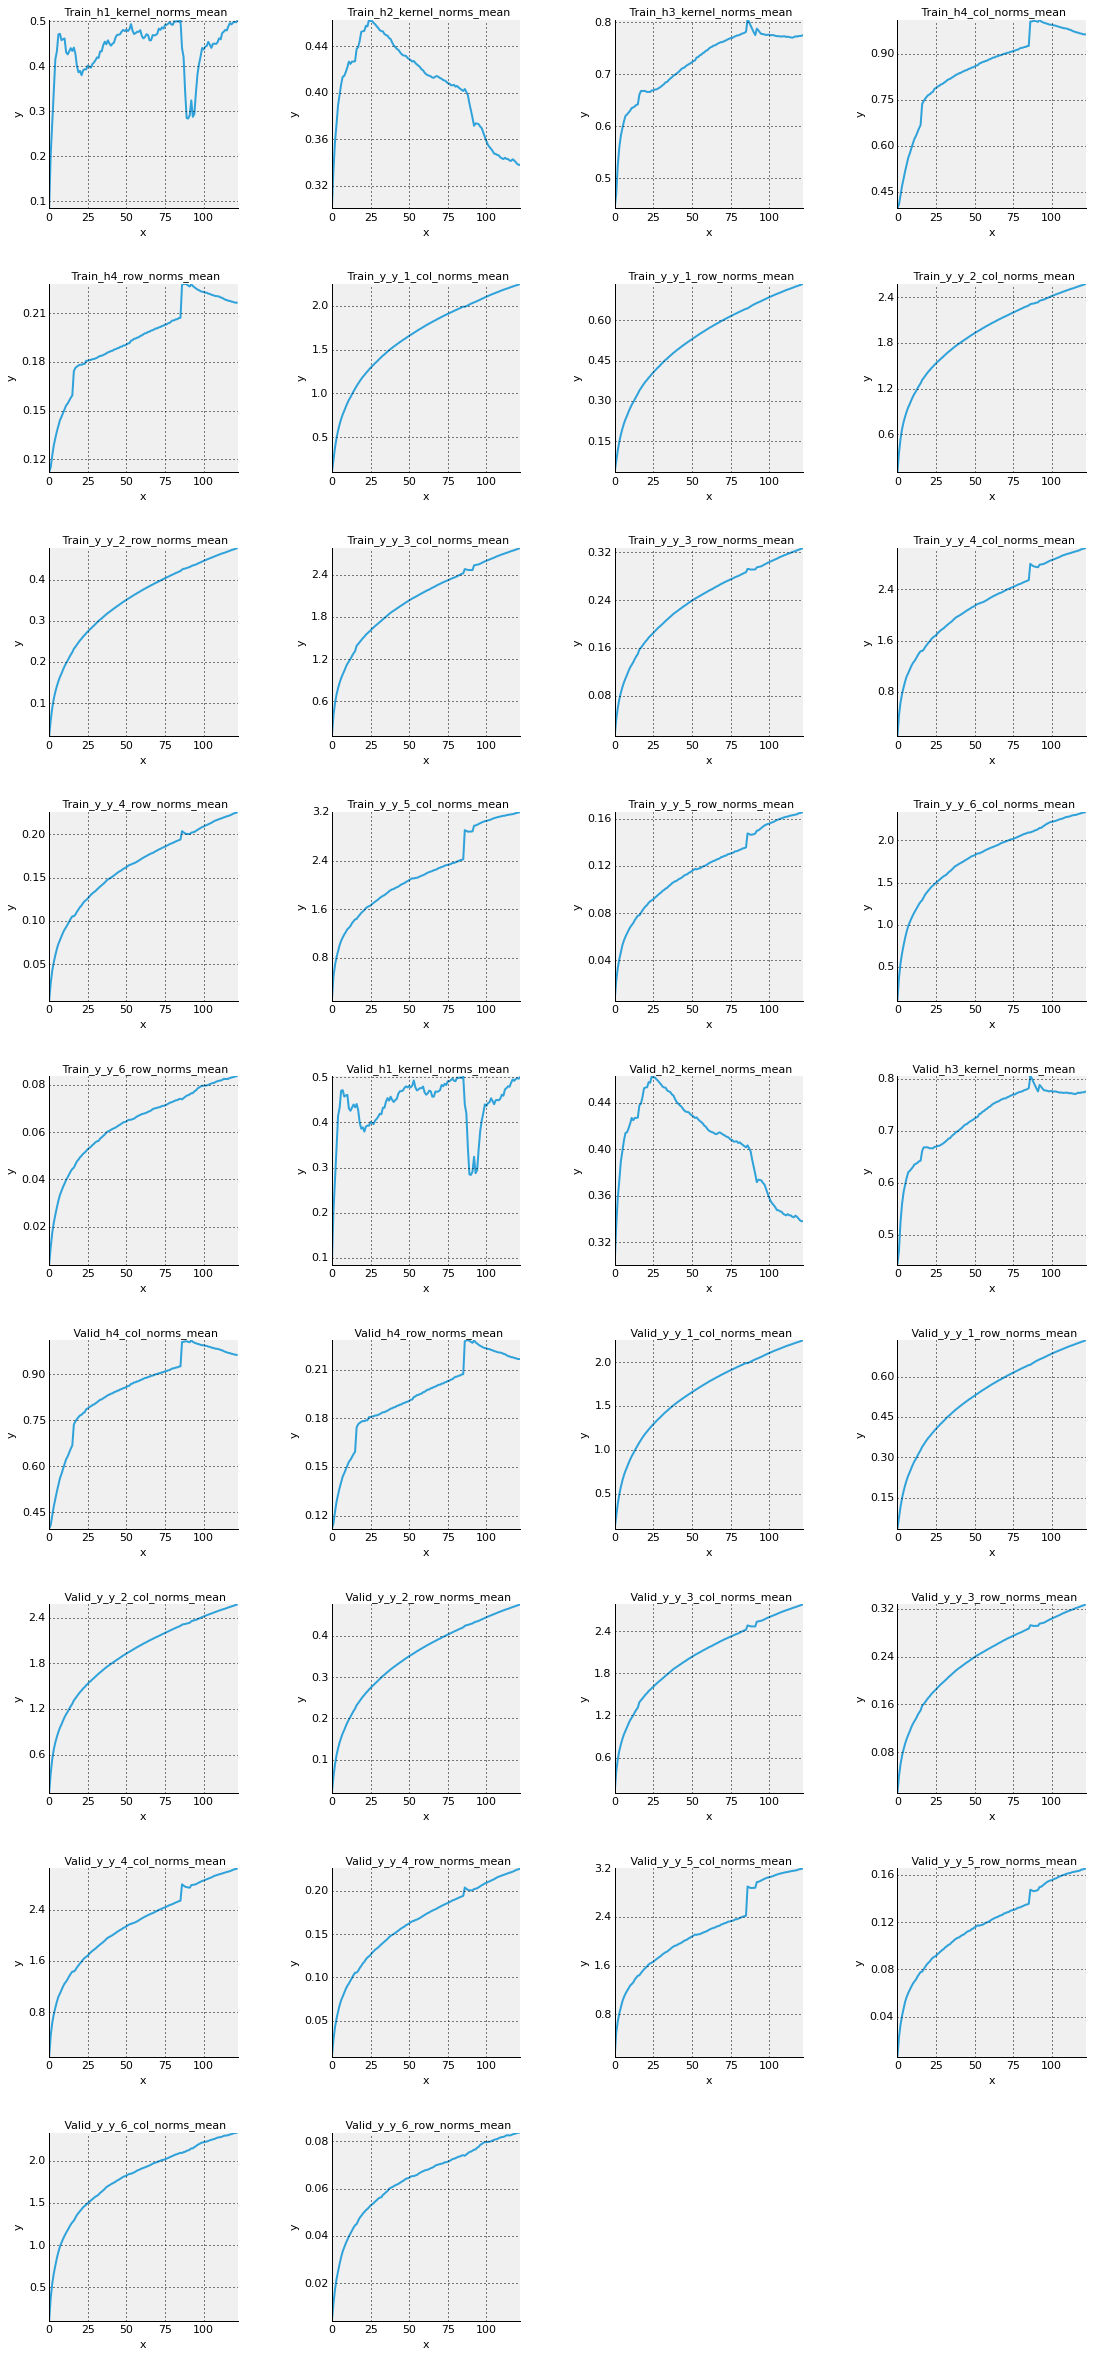

In [17]:
pl.monitor_channels(m, [c for c in m.monitor.channels if "norms_mean" in c], x_axis="epoch")

Learning_rate              
      I : Curve.Learning_rate   (y)
   Momentum                   
      I : Curve.Momentum   (y)
   Total_seconds_last_epoch   
      I : Curve.Total_seconds_last_epoch   (y)
   Train_h1_kernel_norms_max  
      I : Curve.Train_h1_kernel_norms_max   (y)
   Train_h1_kernel_norms_mean 
      I : Curve.Train_h1_kernel_norms_mean   (y)
   Train_h1_kernel_norms_min  
      I : Curve.Train_h1_kernel_norms_min   (y)
   Train_h1_max_x_max_u       
      I : Curve.Train_h1_max_x_max_u   (y)
   Train_h1_max_x_mean_u      
      I : Curve.Train_h1_max_x_mean_u   (y)
   Train_h1_max_x_min_u       
      I : Curve.Train_h1_max_x_min_u   (y)
   Train_h1_mean_x_max_u      
      I : Curve.Train_h1_mean_x_max_u   (y)
   Train_h1_mean_x_mean_u     
      I : Curve.Train_h1_mean_x_mean_u   (y)
   Train_h1_mean_x_min_u      
      I : Curve.Train_h1_mean_x_min_u   (y)
   Train_h1_min_x_max_u       
      I : Curve.Train_h1_min_x_max_u   (y)
   Train_h1_min_x_mean_u      
      I : Curve.Train_h1_min_x_mean_u   (y)
   Train_h1_min_x_min_u       
      I : Curve.Train_h1_min_x_min_u   (y)
   Train_h1_range_x_max_u     
      I : Curve.Train_h1_range_x_max_u   (y)
   Train_h1_range_x_mean_u    
      I : Curve.Train_h1_range_x_mean_u   (y)
   Train_h1_range_x_min_u     
      I : Curve.Train_h1_range_x_min_u   (y)
   Train_h2_kernel_norms_max  
      I : Curve.Train_h2_kernel_norms_max   (y)
   Train_h2_kernel_norms_mean 
      I : Curve.Train_h2_kernel_norms_mean   (y)
   Train_h2_kernel_norms_min  
      I : Curve.Train_h2_kernel_norms_min   (y)
   Train_h2_max_x_max_u       
      I : Curve.Train_h2_max_x_max_u   (y)
   Train_h2_max_x_mean_u      
      I : Curve.Train_h2_max_x_mean_u   (y)
   Train_h2_max_x_min_u       
      I : Curve.Train_h2_max_x_min_u   (y)
   Train_h2_mean_x_max_u      
      I : Curve.Train_h2_mean_x_max_u   (y)
   Train_h2_mean_x_mean_u     
      I : Curve.Train_h2_mean_x_mean_u   (y)
   Train_h2_mean_x_min_u      
      I : Curve.Train_h2_mean_x_min_u   (y)
   Train_h2_min_x_max_u       
      I : Curve.Train_h2_min_x_max_u   (y)
   Train_h2_min_x_mean_u      
      I : Curve.Train_h2_min_x_mean_u   (y)
   Train_h2_min_x_min_u       
      I : Curve.Train_h2_min_x_min_u   (y)
   Train_h2_range_x_max_u     
      I : Curve.Train_h2_range_x_max_u   (y)
   Train_h2_range_x_mean_u    
      I : Curve.Train_h2_range_x_mean_u   (y)
   Train_h2_range_x_min_u     
      I : Curve.Train_h2_range_x_min_u   (y)
   Train_h3_kernel_norms_max  
      I : Curve.Train_h3_kernel_norms_max   (y)
   Train_h3_kernel_norms_mean 
      I : Curve.Train_h3_kernel_norms_mean   (y)
   Train_h3_kernel_norms_min  
      I : Curve.Train_h3_kernel_norms_min   (y)
   Train_h3_max_x_max_u       
      I : Curve.Train_h3_max_x_max_u   (y)
   Train_h3_max_x_mean_u      
      I : Curve.Train_h3_max_x_mean_u   (y)
   Train_h3_max_x_min_u       
      I : Curve.Train_h3_max_x_min_u   (y)
   Train_h3_mean_x_max_u      
      I : Curve.Train_h3_mean_x_max_u   (y)
   Train_h3_mean_x_mean_u     
      I : Curve.Train_h3_mean_x_mean_u   (y)
   Train_h3_mean_x_min_u      
      I : Curve.Train_h3_mean_x_min_u   (y)
   Train_h3_min_x_max_u       
      I : Curve.Train_h3_min_x_max_u   (y)
   Train_h3_min_x_mean_u      
      I : Curve.Train_h3_min_x_mean_u   (y)
   Train_h3_min_x_min_u       
      I : Curve.Train_h3_min_x_min_u   (y)
   Train_h3_range_x_max_u     
      I : Curve.Train_h3_range_x_max_u   (y)
   Train_h3_range_x_mean_u    
      I : Curve.Train_h3_range_x_mean_u   (y)
   Train_h3_range_x_min_u     
      I : Curve.Train_h3_range_x_min_u   (y)
   Train_h4_col_norms_max     
      I : Curve.Train_h4_col_norms_max   (y)
   Train_h4_col_norms_mean    
      I : Curve.Train_h4_col_norms_mean   (y)
   Train_h4_col_norms_min     
      I : Curve.Train_h4_col_norms_min   (y)
   Train_h4_max_x_max_u       
      I : Curve.Train_h4_max_x_max_u   (y)
   Train_h4_max_x_mean_u      
      I : Curve.Train_h4_max_x_mean_u   (y)
 
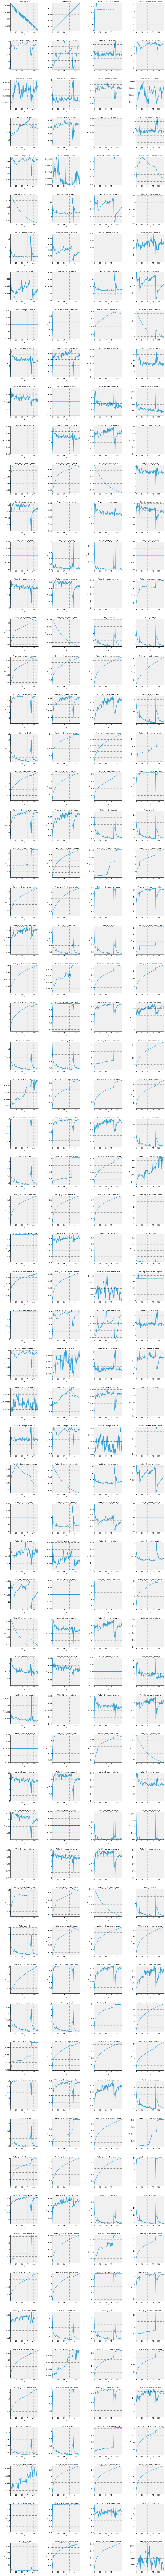

In [8]:
pl.monitor_channels(m,m.monitor.channels.keys(),x_axis="epoch")

Looks like we've got problems with the kernel norms diverging again. This is likely because we didn't recompute what they should be after modifying the max pooling strategy, which would change the input spaces to each layer.

Weights Learned
=====

We can look at the weights learned by this model compared with our most recent best model and see what the differences are. Although, this might be difficult to interpret.

In [9]:
%env PYLEARN2_VIEWER_COMMAND=/afs/inf.ed.ac.uk/user/s08/s0805516/repos/neukrill-net-work/image_hack.sh
%run ~/repos/pylearn2/pylearn2/scripts/show_weights.py /disk/scratch/neuroglycerin/models/experiment_more_pooling.pkl

env: PYLEARN2_VIEWER_COMMAND=/afs/inf.ed.ac.uk/user/s08/s0805516/repos/neukrill-net-work/image_hack.sh
making weights report
loading model
loading done
smallest enc weight magnitude: 3.45098196703e-05
mean enc weight magnitude: 0.0827776491642
max enc weight magnitude: 0.432093173265


In [10]:
from IPython.display import Image

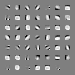

In [11]:
def plot_recent_pylearn2():
    pl2plt = Image(filename="/afs/inf.ed.ac.uk/user/s08/s0805516/tmp/pylearnplot.png", width=700)
    return pl2plt
plot_recent_pylearn2()

Fixing this problem
=======

Using the input dimensions we should have looked at _before_ running this model we can again calculate what our `max_col_norms` should be.